In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *

import pickle

In [3]:
perfectPolicy=pickle.load(open("perfectPolicy.p","rb"))

perfectPolicy

{(0, 0, 0, 0, 0, 0, 0, 0, 0): array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 (1, 0, 0, 0, 0, 0, 0, 0, 0): array([0., 0., 0., 1., 0., 0., 0., 0.]),
 (1, 2, 0, 0, 0, 0, 0, 0, 0): array([0., 0., 1., 0., 0., 0., 0.]),
 (1, 2, 1, 0, 0, 0, 0, 0, 0): array([0., 1., 0., 0., 0., 0.]),
 (1, 2, 1, 2, 0, 0, 0, 0, 0): array([1., 0., 0., 0., 0.]),
 (1, 2, 1, 2, 1, 0, 0, 0, 0): array([1., 0., 0., 0.]),
 (1, 2, 1, 2, 1, 2, 0, 0, 0): array([1., 0., 0.]),
 (1, 2, 1, 2, 1, 2, 0, 1, 0): array([1., 0.]),
 (1, 2, 1, 2, 1, 2, 2, 1, 0): array([1.]),
 (1, 2, 1, 2, 1, 2, 0, 1, 2): array([1.]),
 (1, 2, 1, 2, 1, 0, 2, 0, 0): array([0., 0., 1.]),
 (1, 2, 1, 2, 1, 1, 2, 0, 0): array([0., 1.]),
 (1, 2, 1, 2, 1, 1, 2, 2, 0): array([1.]),
 (1, 2, 1, 2, 1, 1, 2, 0, 2): array([1.]),
 (1, 2, 1, 2, 1, 0, 2, 1, 0): array([0., 1.]),
 (1, 2, 1, 2, 1, 0, 2, 1, 2): array([1.]),
 (1, 2, 1, 2, 1, 0, 0, 2, 0): array([1., 0., 0.]),
 (1, 2, 1, 2, 1, 1, 0, 2, 0): array([1., 0.]),
 (1, 2, 1, 2, 1, 1, 0, 2, 2): array([1.]),
 (1, 2, 1, 

In [4]:
#1
# Function to convert a TicTacToe board to a tuple
def boardToTuple(board):
# Convert the list board to a tuple and concatenate
    return tuple(board)[0]+board[1]+board[2]

# Function to convert a tuple back to a TicTacToe board
def tupleToBoard(board):
    # Split the flat tuple into three parts
    return [list(board[0:3]), list(board[3:6]), list(board[6:9])]

In [5]:
#2
# Determine the status of the TicTacToe game
def status (board):
     # Check for each player if they have won in rows or columns or diagonals
    for who in [1,2]:
        # Checking for rows and columns
        for i in range(3):
            if board [i] [0] == who and board[i] [1] == who and board[i] [2] ==who: 
                # Win in a row
                return who
            if board [0] [i] == who and board[1] [i] == who and board[2] [i] ==who: 
                # Win in a column
                return who
            
            # Checking for diagonals
        if board [0] [0] == who and board[1] [1] == who and board[2] [2] ==who: 
            # Diagonal winning
            return who
        if board [0] [2] == who and board[1] [1] == who and board[2] [0] ==who: 
            # Other diagonal winning
            return who
        
    # this will Check if the game is still ongoing by looking for empty spaces == 0 on the board
    for row in range(3):
         for column in range(3):
              if board[row] [column] == 0:
                   return -1 # return -1 because game is ongoing
    return 0 # return 0 because game is draw, no winners and no empty spaces == 0 


In [6]:
#3
# Dictionary for different policies
policy=dict()
randomPolicy=dict()

# for loop to help us iterate through keys in perfectPolicy
for key in perfectPolicy.keys():
     # Count the number of zeros in the current key
    nr0fZerosInKey=key.count(0)

    # Create a policy for the current key
    policy[key]=numpy.ones((nr0fZerosInKey))/float(nr0fZerosInKey)
    
    # Create a random policy for the current key
    randomPolicy[key]=numpy.ones((nr0fZerosInKey))/float(nr0fZerosInKey)

In [7]:
#4
# Function to play a TicTacToe game based on policies
def play(policy0,policyX):

    # start the TicTacToe board with all empty
    board=[0,0,0,0,0,0,0,0,0]
    currentPlayer=0

    # Store all information in variables  
    policies=[policy0,policyX]
    actions=[[] , []]
    choices=[[] , []]
    choiceProb= [[] , []]

    # while loop gonna continue the game until it reaches a winner or draw
    while status(tupleToBoard(tuple(board)))==-1:
        # Get the current player's policy probabilities for the current board 
        probabilities = policies[currentPlayer][tuple(board)]

        actions[currentPlayer].append(tuple(board))

        emptySpots = [i for i in range(9) if board[i] == 0]

        # Choose an empty spot based on the player's policy probabilities
        target=numpy.random.choice(emptySpots,p=probabilities)

        # Record the choice probability, choice and update the board
        choiceProb[currentPlayer].append(emptySpots.index(target))
        choices[currentPlayer].append(target)
        board[target]=currentPlayer+1

        # Lastly switch players for the next turn
        currentPlayer=1-currentPlayer

    # Return the result of the game,
    return status(tupleToBoard(tuple(board))),actions[0],actions[1],choiceProb[0],choiceProb[1]

# Call function with the policies and store the results
result,actions0,actionsX,choiceProb0,choiceProbX=play(policy, randomPolicy)

play(policy, randomPolicy)

(1,
 [(0, 0, 0, 0, 0, 0, 0, 0, 0),
  (0, 0, 2, 1, 0, 0, 0, 0, 0),
  (0, 0, 2, 1, 2, 0, 0, 0, 1),
  (1, 2, 2, 1, 2, 0, 0, 0, 1)],
 [(0, 0, 0, 1, 0, 0, 0, 0, 0),
  (0, 0, 2, 1, 0, 0, 0, 0, 1),
  (1, 0, 2, 1, 2, 0, 0, 0, 1)],
 [3, 6, 0, 1],
 [2, 2, 0])

In [8]:
#5
# Function to evaluate the performance of two policies
def evaluatePolicies (policy0,policyX,n=1000):
    # start another count for different game outcomes
    count=[0,0,0]

    # Count the outcomes
    for i in range(n):
        result,actions0,actionsX,choiceProb0,choiceProbX=play(policy0,policyX)
        count[result]+=1
    # Return the count
    return count

# print usage of the evaluatePolicies function with different policies
print(evaluatePolicies(policy,randomPolicy))
print(evaluatePolicies(policy,perfectPolicy,n=10000))
print(evaluatePolicies(perfectPolicy,perfectPolicy))

[141, 562, 297]
[2355, 0, 7645]
[1000, 0, 0]


In [9]:
#6
# 60 training epochs
epochs = 60

# Lists to store results
resultsA = list()
resultsB = list()

# Training loop
for epoch in range(epochs):
    #  for loop 90 games per epoch
    for reps in range(90):
        # Play a game using the policy and randomPolicy
        result, actions0, actionsX, choiceProb0, choiceProbX = play(policy, randomPolicy)
        perfectResult, perfectActions0, perfectActionsX, perfectChoiceProb0, perfectChoiceProbX = play(policy, perfectPolicy)

        # with a 0.1 learning rate
        learningRate = 0.1

        # Update policy based on the result, played with randomPolicy
        if result == 1:
            for i in range(len(choiceProb0)):
                policy[(actions0[i])][choiceProb0[i]] += learningRate
                policy[(actions0[i])] /= numpy.sum(policy[(actions0[i])])

        # Update policy based on the result, played with perfectPolicy
        if perfectResult == 0 or perfectResult == 1:
            for i in range(len(perfectChoiceProb0)):
                policy[(perfectActions0[i])][perfectChoiceProb0[i]] += learningRate
                policy[(perfectActions0[i])] /= numpy.sum(policy[(perfectActions0[i])])

    # Evaluate and store results for policy and randomPolicy
    resultsA.append(evaluatePolicies(policy, randomPolicy))
    
    # Evaluate and store results for policy and perfectPolicy
    resultsB.append(evaluatePolicies(policy, perfectPolicy))


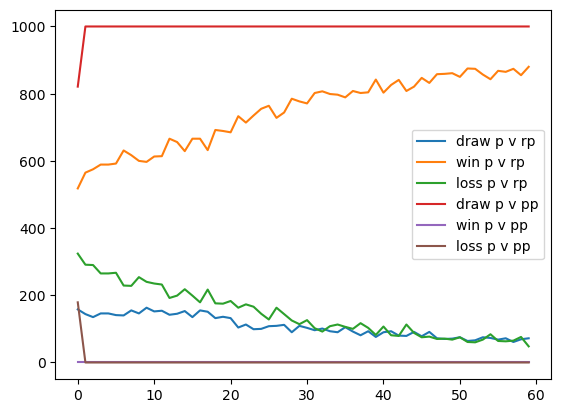

In [10]:
#7
# Plotting the results of policy training
# RandomPolicy
plot(transpose(resultsA) [0] , label="draw p v rp")
plot(transpose(resultsA) [1] , label="win p v rp")
plot(transpose(resultsA) [2] , label="loss p v rp")

# PerfectPolicy
plot(transpose(resultsB) [0] , label="draw p v pp")
plot(transpose(resultsB) [1] , label="win p v pp")
plot(transpose(resultsB) [2] , label="loss p v pp")

legend()

In [11]:
#8
# Print the evaluation results for policy vs randomPolicy
print(evaluatePolicies(policy, randomPolicy))

# Print the evaluation results for policy vs perfectPolicy
print(evaluatePolicies(policy,perfectPolicy,n=10000))

# Print the evaluation results for perfectPolicy vs itself
print(evaluatePolicies(perfectPolicy,perfectPolicy))

[77, 879, 44]
[10000, 0, 0]
[1000, 0, 0]
